In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , OneHotEncoder ,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV ,cross_validate
from sklearn.ensemble import RandomForestRegressor , VotingRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from xgboost import XGBRFRegressor

In [3]:
df = pd.read_csv('New_data.csv')
df

,Unnamed: 0,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,log_price
0,0,Apartment,4000000.0,3.0,3.0,160.0,No,11.0,Cash,Finished,Camp Caesar,15.201805
1,1,Apartment,2250000.0,3.0,2.0,165.0,No,1.0,Cash,Finished,Smoha,14.626441
2,2,Apartment,1900000.0,3.0,2.0,230.0,No,10.0,Cash,Finished,Nasr City,14.457364
3,3,Apartment,1844900.0,4.0,3.0,222.0,No,1.0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,14.427936
4,4,Apartment,1650000.0,2.0,2.0,144.0,No,1.0,Cash,Finished,Sheikh Zayed,14.316286
...,...,...,...,...,...,...,...,...,...,...,...,...
21786,21786,Stand Alone Villa,5500000.0,5.0,4.0,364.0,No,0.0,Cash or Installment,Semi Finished,North Coast,15.520259
21787,21787,Stand Alone Villa,11950000.0,4.0,6.0,392.0,No,0.0,Installment,Finished,Moharam Bik,16.296242
21788,21788,Stand Alone Villa,16500000.0,4.0,4.0,620.0,No,0.0,Cash,Semi Finished,New Cairo - El Tagamoa,16.618871
21789,21789,Stand Alone Villa,16000000.0,5.0,5.0,530.0,No,0.0,Cash,Finished,New Cairo - El Tagamoa,16.588099


In [4]:
df.drop('Unnamed: 0' ,axis=1 ,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21791 entries, 0 to 21790
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            21791 non-null  object 
 1   Price           21791 non-null  float64
 2   Bedrooms        21791 non-null  float64
 3   Bathrooms       21791 non-null  float64
 4   Area            21791 non-null  float64
 5   Furnished       21791 non-null  object 
 6   Level           21791 non-null  float64
 7   Payment_Option  21791 non-null  object 
 8   Delivery_Term   21791 non-null  object 
 9   City            21791 non-null  object 
 10  log_price       21791 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.8+ MB


In [6]:
df.duplicated().sum()

0

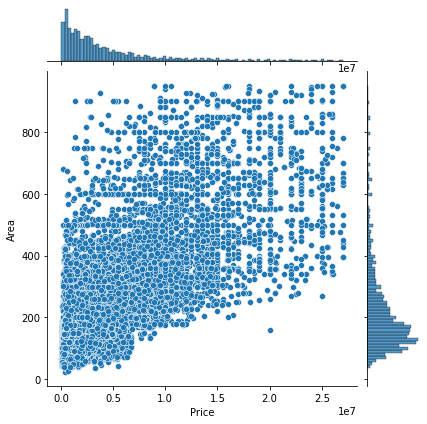

In [7]:
sns.jointplot(x='Price', y='Area', data=df)

<AxesSubplot:xlabel='Price', ylabel='Type'>

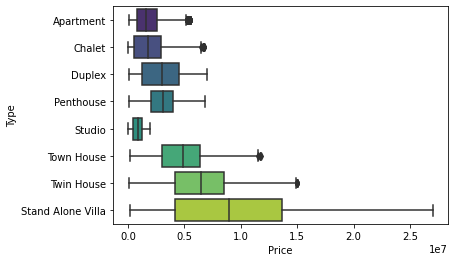

In [8]:
sns.boxplot(y='Type', x='Price', data=df, palette='viridis')

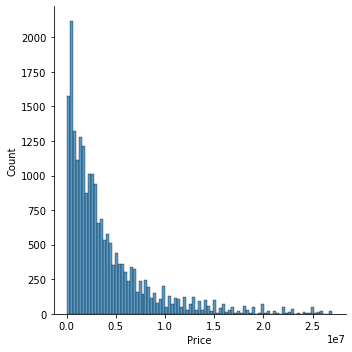

In [9]:
sns.displot(data=df , x= 'Price')

In [10]:
df.describe()

,Price,Bedrooms,Bathrooms,Area,Level,log_price
count,2.179100e+04,21791.000000,21791.000000,21791.000000,21791.000000,21791.000000
mean,4.043871e+06,3.199899,2.744115,223.500066,1.491166,14.631970
std,4.460184e+06,1.144439,1.276669,153.843759,2.089376,1.165435
min,3.300000e+04,1.000000,1.000000,25.000000,0.000000,10.404263
25%,1.006625e+06,3.000000,2.000000,125.000000,0.000000,13.822114
50%,2.575000e+06,3.000000,3.000000,175.000000,1.000000,14.761360
75%,5.240000e+06,4.000000,3.000000,265.000000,2.000000,15.471832
max,2.700000e+07,10.000000,10.000000,950.000000,12.000000,17.111347


## in normal distrurbiation

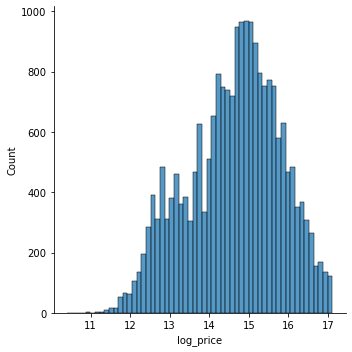

In [11]:
sns.displot(data=df , x= 'log_price')

In [12]:
df.describe()

,Price,Bedrooms,Bathrooms,Area,Level,log_price
count,2.179100e+04,21791.000000,21791.000000,21791.000000,21791.000000,21791.000000
mean,4.043871e+06,3.199899,2.744115,223.500066,1.491166,14.631970
std,4.460184e+06,1.144439,1.276669,153.843759,2.089376,1.165435
min,3.300000e+04,1.000000,1.000000,25.000000,0.000000,10.404263
25%,1.006625e+06,3.000000,2.000000,125.000000,0.000000,13.822114
50%,2.575000e+06,3.000000,3.000000,175.000000,1.000000,14.761360
75%,5.240000e+06,4.000000,3.000000,265.000000,2.000000,15.471832
max,2.700000e+07,10.000000,10.000000,950.000000,12.000000,17.111347


In [13]:
df.drop(['City' ,'Price'],axis=1, inplace=True)

In [14]:
df.columns

Index(['Type', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Payment_Option', 'Delivery_Term', 'log_price'],
      dtype='object')

In [15]:
Encoded_Columns = ['Type', 'Furnished', 'Payment_Option','Delivery_Term']

In [16]:
Encoder = ColumnTransformer(  
    transformers=[("Encoder_oh",OneHotEncoder(sparse=False,drop="first"),['Furnished']),
                  ("Encoder_bin", BinaryEncoder(),['Type', 'Payment_Option','Delivery_Term'])
                 ] , remainder="passthrough")

In [17]:
x= df.drop('log_price',axis=1)
y= df['log_price']

In [18]:
models = list()
models.append(("LinearR",LinearRegression()))
models.append(("CART" , DecisionTreeRegressor()))
models.append(("KNN" , KNeighborsRegressor(n_neighbors=7)))
models.append(("XG" , XGBRFRegressor()))
models.append(("RF" , RandomForestRegressor(n_estimators=100)))
models.append(("Voting" , VotingRegressor(estimators=[("LinearR",LinearRegression()),("CART" , DecisionTreeRegressor()),
                                                       ("KNN" , KNeighborsRegressor(n_neighbors=7)) ,
                                                      ("XG" , XGBRFRegressor()) ,
                                                       ("RF" , RandomForestRegressor(n_estimators=100))]))  )

In [19]:
for model in models:
    steps= list()
    steps.append(('encoder' , Encoder))
    steps.append(('scaler' , StandardScaler()))
    steps.append((model))
    pipeline= Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring="r2", return_train_score=True)
    print(model[0])
    print('fit time:',scores['fit_time'].mean())
    print("Train r2 is " , scores["train_score"].mean())
    print("Test r2 is " , scores["test_score"].mean())
    print("="*50)

LinearR
fit time: 0.24526124000549315
Train r2 is  0.45368901584042715
Test r2 is  0.14792401971803928
CART
fit time: 0.308054256439209
Train r2 is  0.8293401077134368
Test r2 is  -0.5887859373680184
KNN
fit time: 0.34232749938964846
Train r2 is  0.580080313102061
Test r2 is  0.0927119489874629
XG
fit time: 1.5199748039245606
Train r2 is  0.49454822986505687
Test r2 is  0.022852304822157367
RF
fit time: 7.550905370712281
Train r2 is  0.7913833265717644
Test r2 is  -0.09787941634719625
Voting
fit time: 8.884103298187256
Train r2 is  0.7045440311080698
Test r2 is  0.10607682234027764


##  * pipeline cant get ( r2_score , mean absolute error ,mean squaread error ) , for reggression problems lets try by split data for train and test with each model .

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,shuffle = True ,random_state = 21)

In [21]:
def performance(model,X_train,y_train,y_pred,y_test):
    print('Training Score:',pipeline.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [1]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("LinearR",LinearRegression()))
pipeline= Pipeline(steps=steps)

NameError: name 'Encoder' is not defined

In [23]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [24]:
performance(pipeline,X_train,y_train,y_pred,y_test)

Training Score: 0.4742768492832291
Testing Score: 0.4527236040909347
MSE: 0.7223481323313707
MAE: 0.6810794649287084


In [25]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" , DecisionTreeRegressor(criterion= 'mae', max_depth= 7,max_features= 'auto')))
pipeline= Pipeline(steps=steps)

In [26]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [27]:
performance(pipeline,X_train,y_train,y_pred,y_test)

Training Score: 0.4487151307020435
Testing Score: 0.38641686323300695
MSE: 0.8098661593790104
MAE: 0.6311139518410146


## * try grid search with DecisionTree model .

In [28]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" , DecisionTreeRegressor()))
pipeline= Pipeline(steps=steps)

In [29]:
params = [
    
    { "Model__criterion" : ["mse", "friedman_mse", "mae", "poisson"] ,  "Model__max_depth" : range(5 , 10 ) ,
      "Model__max_features" :["auto", "sqrt", "log2"]}
]

In [30]:
grid = GridSearchCV(estimator = pipeline , param_grid = params , cv = 5  ,return_train_score=True ,  scoring = "r2" )

In [31]:
grid.fit(x,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Encoder_oh',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Furnished']),
                                                                        ('Encoder_bin',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Payment_Option',
                                                                          'Delivery_Term'])])),
                                       ('scaler', StandardScaler()),
                                       ('Model', DecisionTreeRegressor())]),
             param_grid=[{'Model__criterion': ['mse', 'friedman_mse', 'mae',
                                               'poisson'],
                          'Model__max_depth': range(5, 10),
                          'Model__max_features': ['auto', 'sqrt', 'log2']}],
             return_train_score=True, scoring='r2')

In [32]:
grid.best_params_

{'Model__criterion': 'mse',
 'Model__max_depth': 9,
 'Model__max_features': 'log2'}

In [33]:
grid.cv_results_["mean_train_score"].max()

0.5378632870567142

In [34]:
grid.cv_results_["mean_test_score"].max()

0.10581569336970786

In [35]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" , RandomForestRegressor(n_estimators=100,max_depth=8 )))
pipeline= Pipeline(steps=steps)

In [36]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [37]:
performance(pipeline,X_train,y_train,y_pred,y_test)

Training Score: 0.5499236482406971
Testing Score: 0.4907955647133212
MSE: 0.6720970894299263
MAE: 0.6364140903288369


## * try grid search with RandomForest model .

In [38]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" , RandomForestRegressor(n_estimators=100)))
pipeline= Pipeline(steps=steps)

In [39]:
params = [
    
    { "Model__criterion" : ["mse", "mae"] ,  "Model__max_depth" : (5,7,9,11,13,15)}
]

In [40]:
grid = GridSearchCV(estimator = pipeline , param_grid = params , cv = 5  ,return_train_score=True ,  scoring = "r2" )

In [41]:
grid.fit(x,y)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
grid.cv_results_["mean_train_score"].max()

In [ ]:
grid.cv_results_["mean_test_score"].max()

In [ ]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("XG" , XGBRFRegressor()))
pipeline= Pipeline(steps=steps)

In [ ]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
performance(pipeline,X_train,y_train,y_pred,y_test)

## * try grid search with XGboost model .

In [ ]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" , XGBRFRegressor()))
pipeline= Pipeline(steps=steps)

In [ ]:
params = [
    
    { "Model__n_estimators" : (10,20,30,40,50) ,
     "Model__max_leaves" : (3,4,5,6,7,8)}
]

In [ ]:
grid = GridSearchCV(estimator = pipeline , param_grid = params , cv = 5  ,return_train_score=True ,  scoring = "r2" )

In [ ]:
grid.fit(x,y)

In [ ]:
grid.best_params_

In [ ]:
grid.cv_results_["mean_train_score"].max()

In [ ]:
grid.cv_results_["mean_test_score"].max()

## * number of neighbors equal 7 , i had tried many numbers and 7 the best .

In [ ]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" ,  KNeighborsRegressor(n_neighbors=7)))
pipeline= Pipeline(steps=steps)

In [ ]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
performance(pipeline,X_train,y_train,y_pred,y_test)

In [42]:
steps= list()
steps.append(('encoder' , Encoder))
steps.append(('scaler' , StandardScaler()))
steps.append(("Model" ,  VotingRegressor(estimators=[("LinearR",LinearRegression()),
                                                     ("CART" , DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 7,max_features= 'auto')),
                                                       ("KNN" , KNeighborsRegressor(n_neighbors=7)) ,
                                                      ("XG" , XGBRFRegressor()) ,
                                                       ("RF" , RandomForestRegressor(n_estimators=100))])))
pipeline= Pipeline(steps=steps)

In [43]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

In [44]:
performance(pipeline,X_train,y_train,y_pred,y_test)

Training Score: 0.6311484717661977
Testing Score: 0.5008106689360148
MSE: 0.6588781896483089
MAE: 0.6292318555815132


## voting model get the best score and get the least ( MSE , MAE ) .
### * saving the final pipeline, using the voting to make the prediction .

In [45]:
import joblib

In [46]:
pipeline.fit(x,y)
joblib.dump(x.columns,"input.h5")

['input.h5']

In [47]:
joblib.dump(pipeline,'Price Prediction ML model.h5')

['Price Prediction ML model.h5']